# In this notebook, I work with a US Health Insurance dataset doing Exploratory Data Analysis.

### Link to dataset (https://www.kaggle.com/teertha/ushealthinsurancedataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance = pd.read_csv("/Users/lucasmendicino/desktop/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.shape

(1338, 7)

In [5]:
# Let's look into the types of data we have.
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Let's do a univariate exploration of our numerical features: Age, BMI, and Charges

## Age

In [8]:
round(insurance["age"].describe(),1)

count    1338.0
mean       39.2
std        14.0
min        18.0
25%        27.0
50%        39.0
75%        51.0
max        64.0
Name: age, dtype: float64

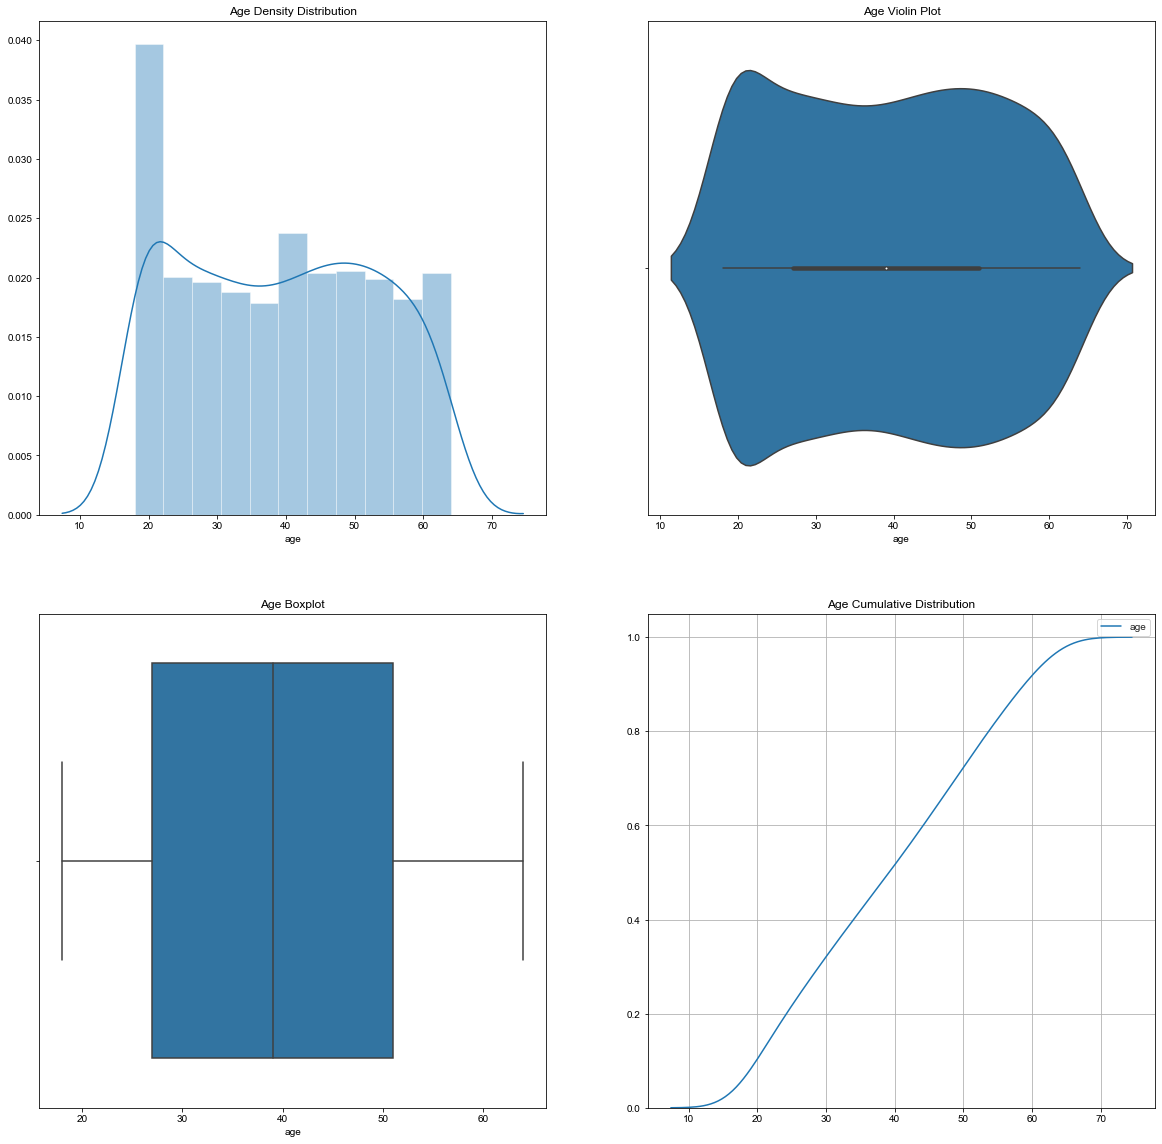

In [9]:
f, ax = plt.subplots(2, 2, figsize = (20,20))
sns.set_style('whitegrid')

sns.distplot(insurance['age'], ax = ax[0,0])
ax[0,0].set_title('Age Density Distribution')

sns.violinplot(insurance['age'], pallete = 'Accent', splot = True, ax = ax[0,1])
ax[0,1].set_title('Age Violin Plot')

sns.boxplot(insurance['age'], ax = ax[1,0])
ax[1,0].set_title('Age Boxplot')

sns.kdeplot(insurance['age'], cumulative = True, ax = ax[1,1])
ax[1,1].set_title('Age Cumulative Distribution')

plt.grid()
plt.show()

In [10]:
print("Mean:", round(insurance['age'].mean(),1))
print("Median:", insurance['age'].median())
print("Skewness:", round(insurance['age'].skew(),3))
Q1a = insurance['age'].quantile(0.25)
Q2a = insurance['age'].quantile(0.50)
Q3a = insurance['age'].quantile(0.75)
IQRa = Q3a - Q1a
print("Number of outliers:", ((insurance['age'] < (Q1a - 1.5 * IQRa)) | 
                              (insurance['age'] > (Q3a + 1.5 * IQRa))).sum())


Mean: 39.2
Median: 39.0
Skewness: 0.056
Number of outliers: 0


In [11]:
# Let's test for normality of the distribution of Age using the Shapiro-Wilk Test
# The null hypothesis states that age is a simple random sample from a normal population

from scipy import stats
shapiro_testa = stats.shapiro(insurance['age'])
shapiro_testa

(0.9446991682052612, 5.687479624670986e-22)

### We reject the null, and find that age is not from a normal distribution. Age has a mean of 39.2 years, with the youngest insured at 18 years and the oldest at 64 years. There are no outliers in Age.

## BMI

In [12]:
round(insurance["bmi"].describe(),2)

count    1338.00
mean       30.66
std         6.10
min        15.96
25%        26.30
50%        30.40
75%        34.69
max        53.13
Name: bmi, dtype: float64

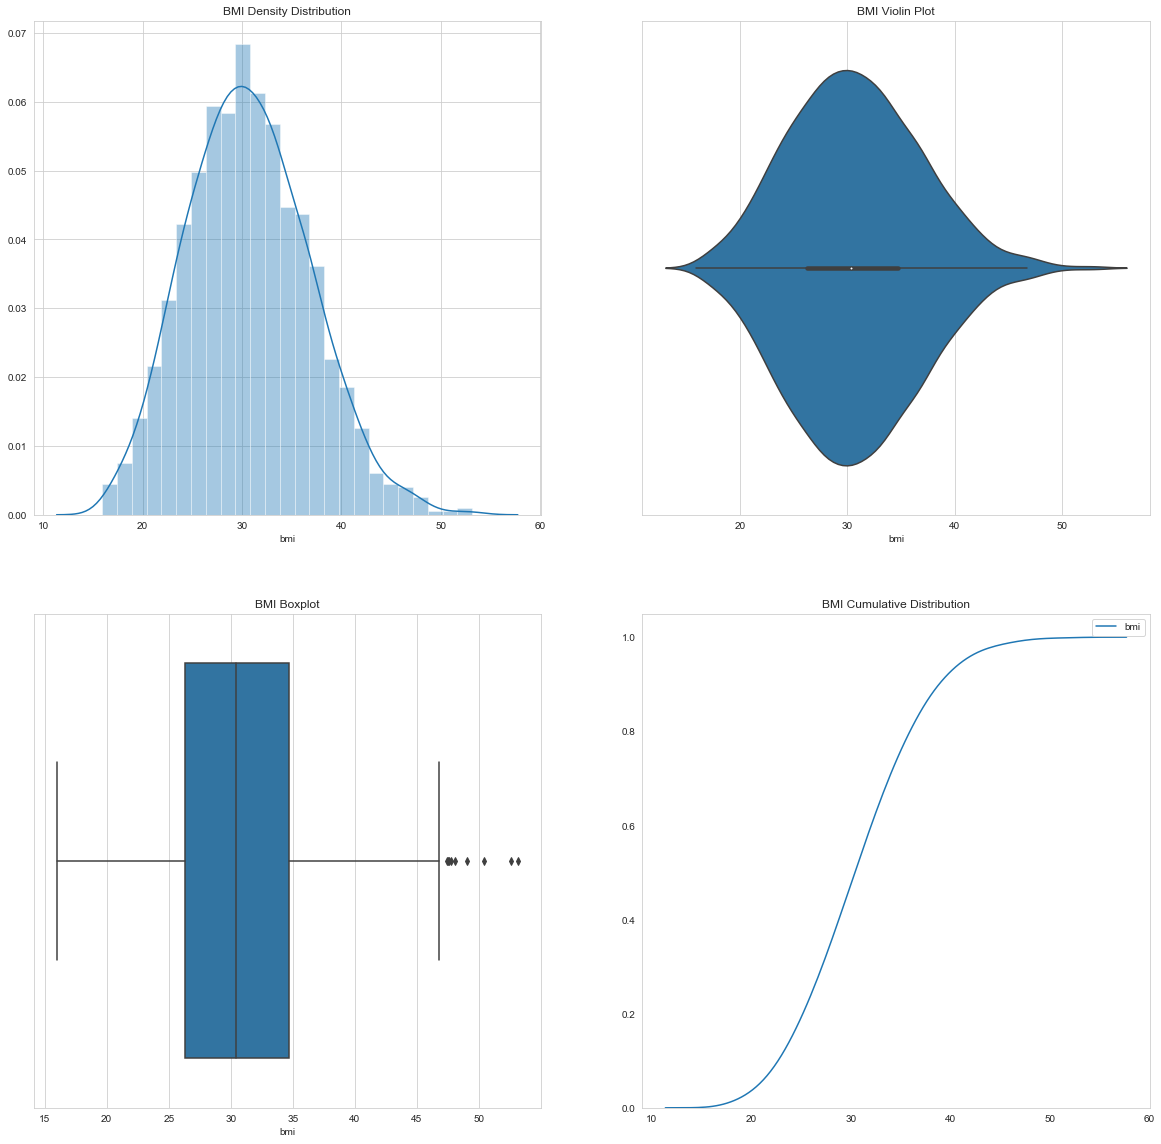

In [13]:
f, ax = plt.subplots(2, 2, figsize = (20,20))
sns.set_style('whitegrid')

sns.distplot(insurance['bmi'], ax = ax[0,0])
ax[0,0].set_title('BMI Density Distribution')

sns.violinplot(insurance['bmi'], pallete = 'Accent', splot = True, ax = ax[0,1])
ax[0,1].set_title('BMI Violin Plot')

sns.boxplot(insurance['bmi'], ax = ax[1,0])
ax[1,0].set_title('BMI Boxplot')

sns.kdeplot(insurance['bmi'], cumulative = True, ax = ax[1,1])
ax[1,1].set_title('BMI Cumulative Distribution')

plt.grid()
plt.show()

In [14]:
print("Mean:", round(insurance['bmi'].mean(),1))
print("Median:", insurance['bmi'].median())
print("Skewness:", round(insurance['bmi'].skew(),3))
Q1b = insurance['bmi'].quantile(0.25)
Q2b = insurance['bmi'].quantile(0.50)
Q3b = insurance['bmi'].quantile(0.75)
IQRb = Q3b - Q1b
print("Number of outliers:", ((insurance['bmi'] < (Q1b - 1.5 * IQRb)) | 
                              (insurance['bmi'] > (Q3b + 1.5 * IQRb))).sum())

Mean: 30.7
Median: 30.4
Skewness: 0.284
Number of outliers: 9


In [15]:
shapiro_testb = stats.shapiro(insurance['bmi'])
shapiro_testb

(0.9938876032829285, 2.609841976664029e-05)

### Body Mass Index is not from a normally distributed population. It has a mean of 30.7, with the minimum BMI of 15.96 and maximum of 53.13. There are 9 outliers, all on the right tail of the distribution. 

## Charges

In [16]:
round(insurance["charges"].describe(),2)

count     1338.00
mean     13270.42
std      12110.01
min       1121.87
25%       4740.29
50%       9382.03
75%      16639.91
max      63770.43
Name: charges, dtype: float64

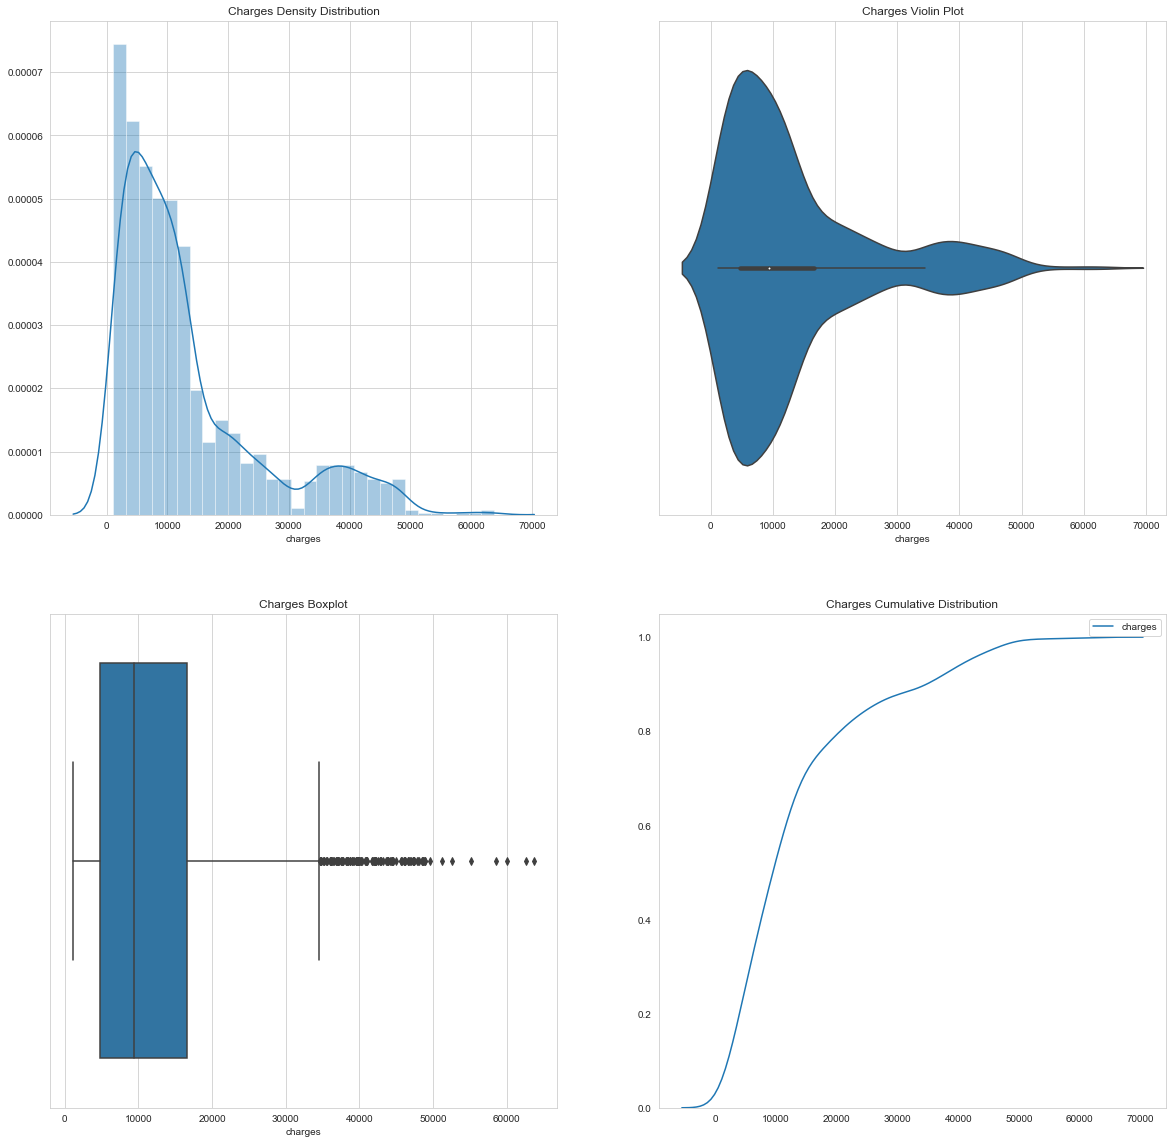

In [17]:
f, ax = plt.subplots(2, 2, figsize = (20,20))
sns.set_style('whitegrid')

sns.distplot(insurance['charges'], ax = ax[0,0])
ax[0,0].set_title('Charges Density Distribution')

sns.violinplot(insurance['charges'], pallete = 'Accent', splot = True, ax = ax[0,1])
ax[0,1].set_title('Charges Violin Plot')

sns.boxplot(insurance['charges'], ax = ax[1,0])
ax[1,0].set_title('Charges Boxplot')

sns.kdeplot(insurance['charges'], cumulative = True, ax = ax[1,1])
ax[1,1].set_title('Charges Cumulative Distribution')

plt.grid()
plt.show()

In [18]:
print("Mean:", round(insurance['charges'].mean(),1))
print("Median:", insurance['charges'].median())
print("Skewness:", round(insurance['charges'].skew(),3))
Q1c = insurance['charges'].quantile(0.25)
Q2c = insurance['charges'].quantile(0.50)
Q3c = insurance['charges'].quantile(0.75)
IQRc = Q3c - Q1c
print("Number of outliers:", ((insurance['charges'] < (Q1c - 1.5 * IQRc)) | 
                              (insurance['charges'] > (Q3c + 1.5 * IQRc))).sum())

Mean: 13270.4
Median: 9382.033
Skewness: 1.516
Number of outliers: 139


In [19]:
shapiro_testc = stats.shapiro(insurance['charges'])
shapiro_testc

(0.814687967300415, 1.150477698013898e-36)

## Charges is heavily skewed to the left with a mean of 13,270.40 and a minimum charge of 1121.87 and maximum charge of 63,770.42. There are 139 outliers, all on the higher charge side.

# Let's explore our categorical features: Sex, Smoker, Region, and Children

## Sex

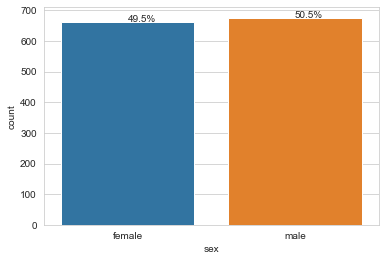

In [20]:
ax = sns.countplot(insurance['sex'])

total = len(insurance['sex'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() - 0.02
        ax.annotate(percentage, (x, y))

plt.show()


## Smoker

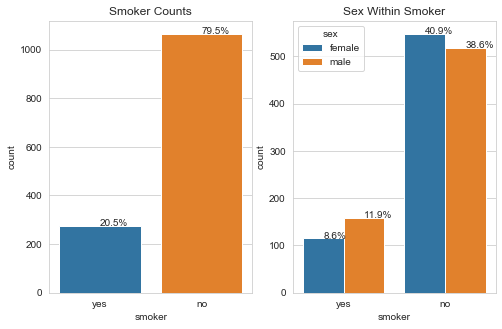

In [21]:
f, ax = plt.subplots(1,2, figsize = (8,5))

s = sns.countplot(insurance['smoker'], ax = ax[0])
ax[0].set_title('Smoker Counts')

total = len(insurance['smoker'])
for p in ax[0].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() - 0.02
        ax[0].annotate(percentage, (x, y))

ss = sns.countplot(insurance['smoker'], hue = insurance['sex'], ax = ax[1])
ax[1].set_title('Sex Within Smoker')
for p in ax[1].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() - 0.02
        ax[1].annotate(percentage, (x, y))
plt.show()

In [22]:
# How do premiums compare between smokers and non-smokers?

insurance['charges'].groupby(insurance['smoker']).mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

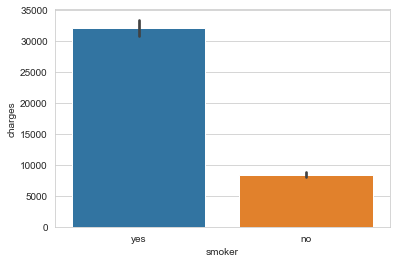

In [23]:
sns.barplot(insurance['smoker'], insurance['charges'])
plt.show()

In [24]:
insurance.groupby(['smoker', 'sex']).agg('count')['age']

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: age, dtype: int64

# Regions

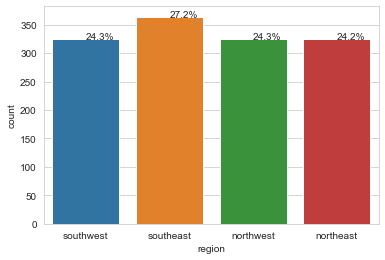

In [25]:
ax = sns.countplot(insurance['region'])

total = len(insurance['region'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() - 0.02
        ax.annotate(percentage, (x, y))

plt.show()

# Number of Children

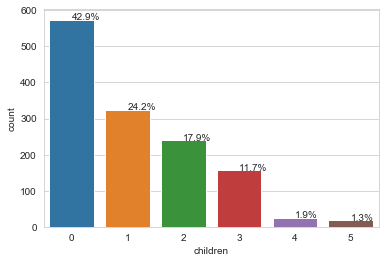

In [26]:
ax = sns.countplot(insurance['children'])

total = len(insurance['children'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() - 0.02
        ax.annotate(percentage, (x, y))
        
plt.show()

In [27]:
insurance.groupby(['children']).mean()['age'].round(1)

children
0    38.4
1    39.5
2    39.4
3    41.6
4    39.0
5    35.6
Name: age, dtype: float64

In [43]:
# new variable: pregancies -- # of pregnancies

females = insurance[insurance['sex'] == 0]

insurance['pregnancies'] = females['children']
insurance['pregnancies'] = insurance['pregnancies'].replace(np.nan,0)

insurance.describe()

,age,sex,bmi,children,smoker,region,charges,pregnancies
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.53139
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.99557
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.00000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.00000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,0.00000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.00000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,5.00000


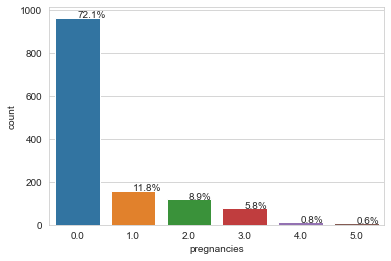

In [44]:
ax = sns.countplot(insurance['pregnancies'])

total = len(insurance['pregnancies'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() - 0.02
        ax.annotate(percentage, (x, y))

plt.show()


# Let's visualize all our variables using a pairplot

In [36]:
# convert to category

for x in ['sex', 'children', 'smoker', 'region', 'pregnancies']:
    insurance[x] = insurance[x].astype('category')
    
insurance.dtypes

age               int64
sex            category
bmi             float64
children       category
smoker         category
region         category
charges         float64
pregnancies    category
dtype: object

In [37]:
# select all columns of the dataFrame with datatype = category:

categories = insurance.select_dtypes(['category']).columns
categories

Index(['sex', 'children', 'smoker', 'region', 'pregnancies'], dtype='object')

In [38]:
# transform the original columns by replacing the elements with their category codes:

insurance[categories] = insurance[categories].apply(lambda x: x.cat.codes)
insurance.head()

,age,sex,bmi,children,smoker,region,charges,pregnancies
0,19,0,27.900,0,1,3,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,-1
2,28,1,33.000,3,0,2,4449.46200,-1
3,33,1,22.705,0,0,1,21984.47061,-1
4,32,1,28.880,0,0,1,3866.85520,-1


/Users/lucasmendicino/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/lucasmendicino/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


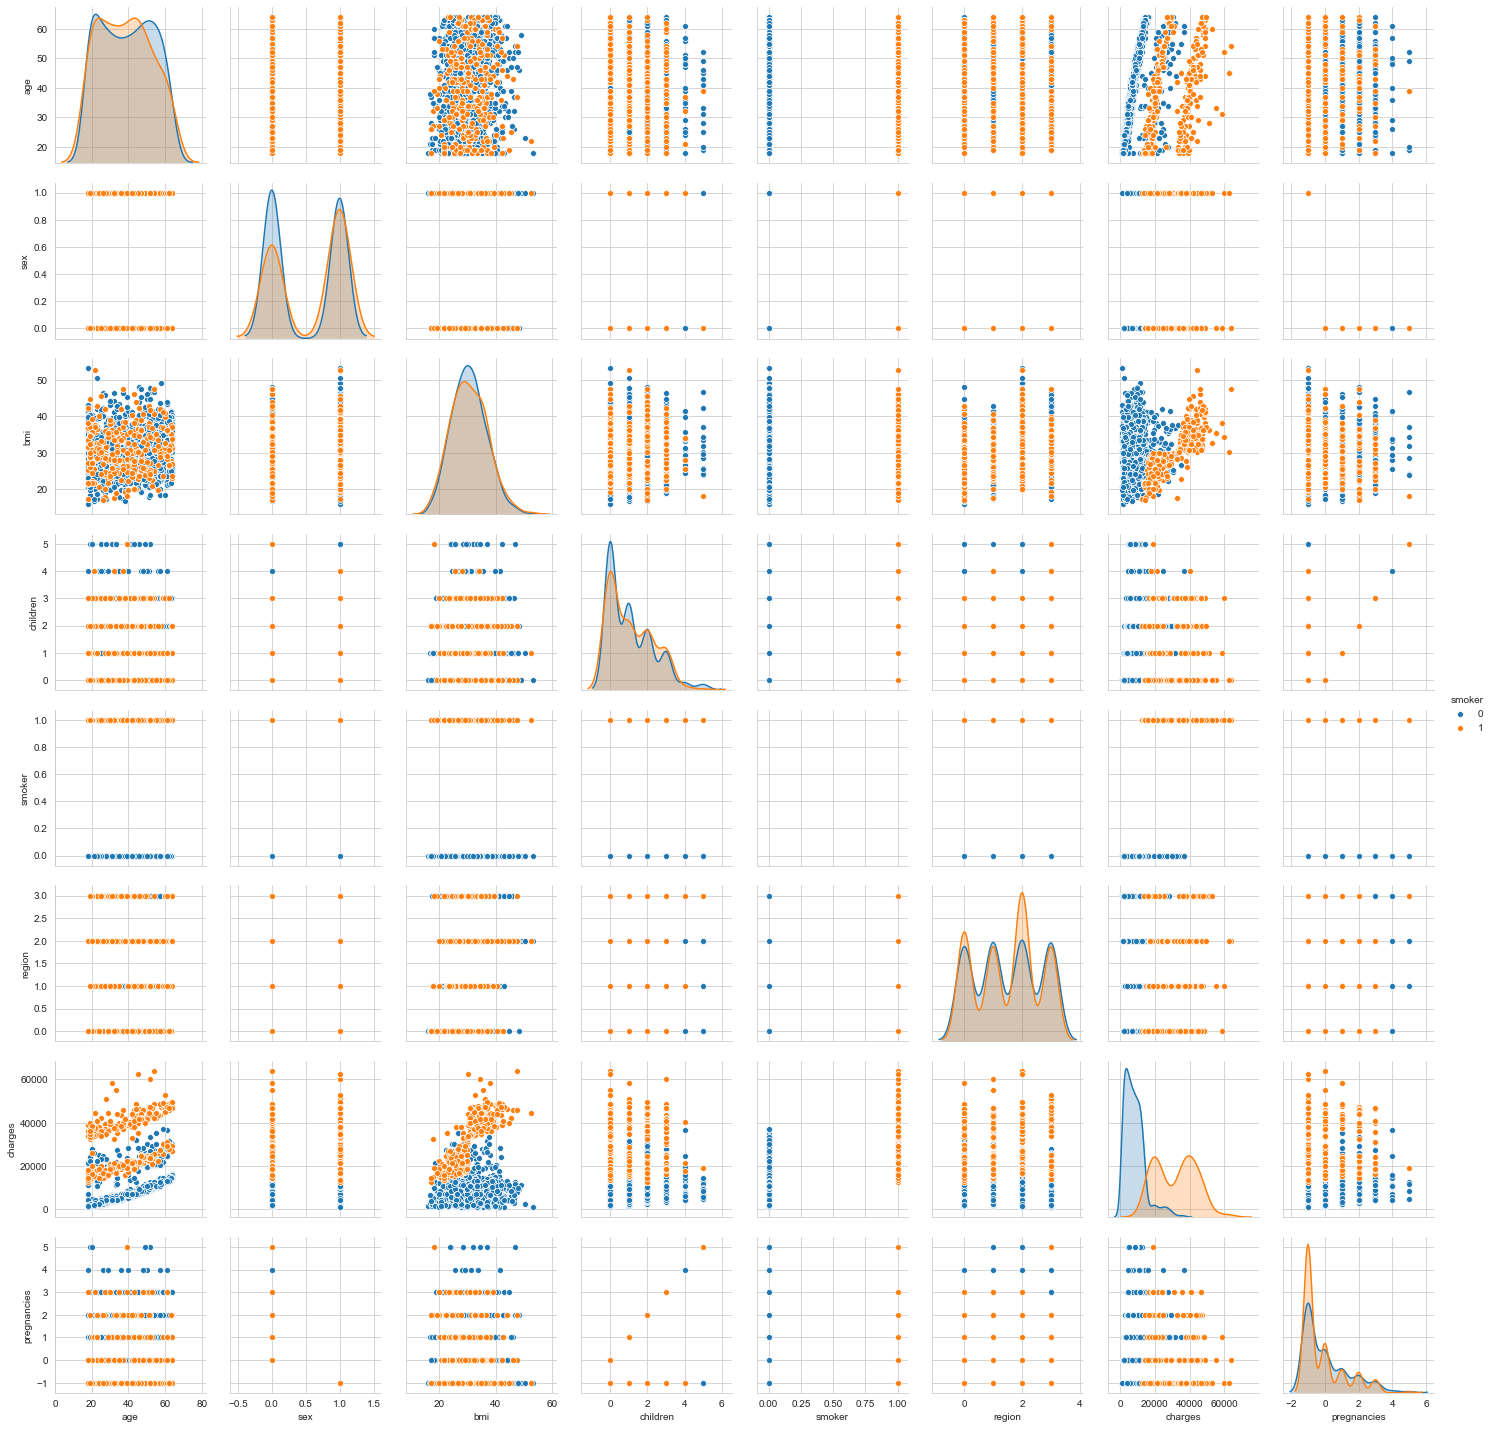

In [39]:
sns.pairplot(insurance, hue = 'smoker')
plt.show()

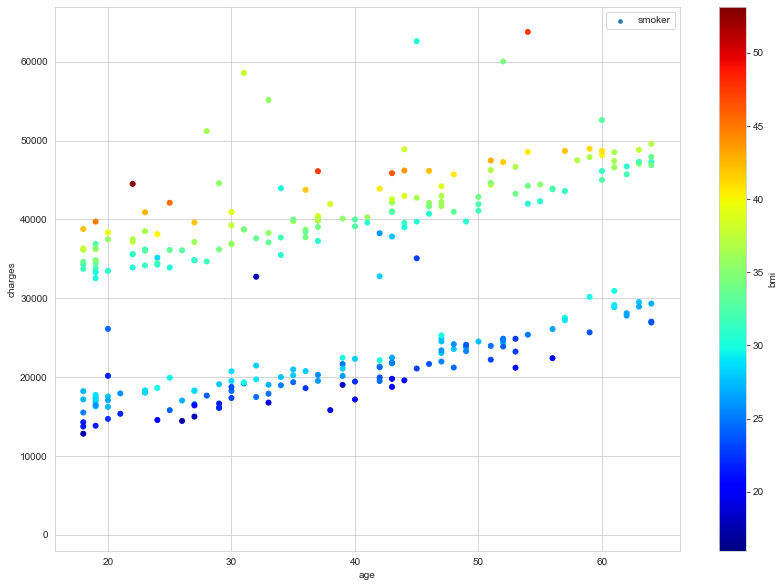

In [40]:
insurance.plot(kind = "scatter", x = "age", y = "charges",
              s = insurance["smoker"]*25, label = "smoker", figsize = (14,10),
              c = 'bmi', cmap = plt.get_cmap("jet"), colorbar = True, sharex = False)
plt.legend()
plt.show()